# Imports

In [5]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [6]:
n = 6
label_name = "stat3"
layers = [2]

epochs = 5000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [7]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [8]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.400118768215179
Epoch 1, Loss 6.3659239411354065
Epoch 2, Loss 6.334520637989044
Epoch 3, Loss 6.303215384483337
Epoch 4, Loss 6.256889820098877
Epoch 5, Loss 6.212804734706879
Epoch 6, Loss 6.185563683509827
Epoch 7, Loss 6.152151584625244
Epoch 8, Loss 6.139456868171692
Epoch 9, Loss 6.073600113391876
Epoch 10, Loss 6.0688400864601135
Epoch 11, Loss 6.051439106464386
Epoch 12, Loss 6.019085645675659
Epoch 13, Loss 5.9969605803489685
Epoch 14, Loss 5.968990206718445
Epoch 15, Loss 5.964405357837677
Epoch 16, Loss 5.925155818462372
Epoch 17, Loss 5.903452634811401
Epoch 18, Loss 5.893595814704895
Epoch 19, Loss 5.862296998500824
Epoch 20, Loss 5.817291021347046
Epoch 21, Loss 5.8303017020225525
Epoch 22, Loss 5.791458189487457
Epoch 23, Loss 5.819077014923096
Epoch 24, Loss 5.774681389331818
Epoch 25, Loss 5.758143186569214
Epoch 26, Loss 5.762662708759308
Epoch 27, Loss 5.729695737361908
Epoch 28, Loss 5.711503565311432
Epoch 29, Loss 5.67694628238678
Epoch 30, Loss 5.

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

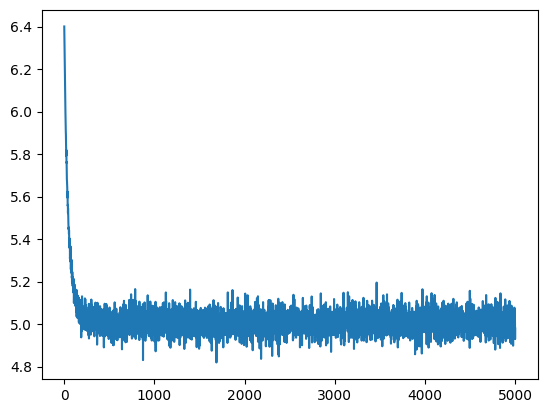

In [9]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

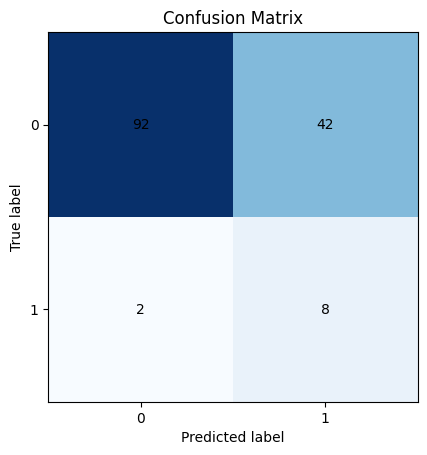

Accuracy for class 0 = 68.65671641791045%
Accuracy for class 1 = 80.0%
Overall accuracy = 69.44444444444444%


In [10]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

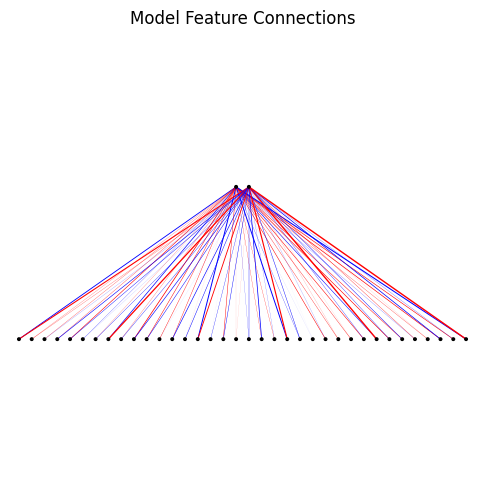

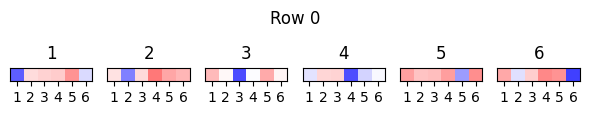

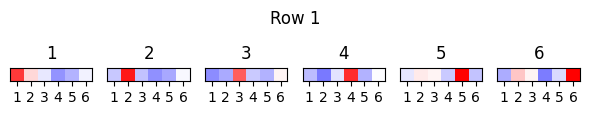

In [11]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)